UCB based on Hoeffding's inequality

$P[ \bar{X} - E(\bar{X}) \ge t ] \le e^{-2nt^2} = p$

We consider $p = N^{-4}$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Bandit class

class Bandit:
    def __init__(self,p):
        #p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0.
        
    def pull(self):
        #draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self,x):
        self.N += 1
        N = self.N
        self.p_estimate = x/N + (N-1)/N * self.p_estimate

In [3]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def ucb(mean, n, nj):
    return mean + np.sqrt(2 * np.log(n) / nj )

def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0
    
    # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
        
    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(mean = bandit.p_estimate, n = total_plays, nj = bandit.N) for bandit in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
        rewards[i] = x
    
    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate: ", b.p_estimate)
        
    #print total reward
    print('total reward earned: ', rewards.sum())
    print('overall win rate: ', rewards.sum() / NUM_TRIALS)
    
    #plot results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

mean estimate:  0.2615384615384615
mean estimate:  0.4808743169398905
mean estimate:  0.7563300871348022
total reward earned:  7481.0
overall win rate:  0.7481


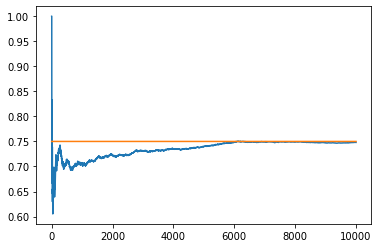

In [4]:
run_experiment()